In [ ]:
#### Pre-proceesing for cdr3 sequnces ###

import os
import pandas as pd

''' This section go over all the cdr3 results (from each fastq sample) and concat it to one list and save then name file for each sequnce near by '''

# Define the directory containing your files
WORK_DIR = f'/dsi/sbm/linoym/oracle_cloud/algo_results'

# Initialize dictionaries to hold DataFrames for each label
data_label = {'PSCUC': [], 'PSC': [], 'Control': [], 'UC': []}

# Iterate over all files in the directory that start with "CDR3_results" and sre txt file. Those file are ooutputs from Tmer algo.
for filename in os.listdir(WORK_DIR):
    if filename.startswith('CDR3_results') and filename.endswith('.txt'):
        if '_PSCUC' in filename:
            label = 'PSCUC'
        elif '_PSC' in filename:
            label = 'PSC'
        elif '_Control' in filename:
            label = 'Control'
        elif '_UC' in filename:
            label = 'UC'
        else:
            continue
        
        # Load the file into a DataFrame
        filepath = os.path.join(WORK_DIR, filename)
        cdr_from_file_df = pd.read_csv(filepath, header=None, names=['CDR3_sequence'])  # No header, add header named 'CDR3_sequence'
        cdr_from_file_df['source_file'] = filename
        
        # Append the DataFrame to the appropriate list
        data_label[label].append(cdr_from_file_df)

for label, cdr3_df in data_label.items():
    if cdr3_df:
        combined_df = pd.concat(cdr3_df, ignore_index=True)
        ###output_filename = os.path.join(WORK_DIR, f'combined_CDR3_{label}.csv')
        ###combined_df.to_csv(output_filename, sep='\t', index=False, header=True)
        ###print(f"Saved concatenated file for {label} to {output_filename}")

print("Concatenation complete.")


''' This section is response to combined 4 dfs: Control,PSCUC,PSC,UC and Control  to one file '''

# Combine all subtype DataFrames into one
combined_dataframes = []
for label, cdr3_df in data_label.items():
    if cdr3_df:
        cdr3_label_df = pd.concat(cdr3_df, ignore_index=True)
        combined_dataframes.append(cdr3_label_df)
# Concatenate all DataFrames in the list into a single DataFrame
all_cdr3_df = pd.concat(combined_dataframes, ignore_index=True)
combined_output_filename = os.path.join(WORK_DIR, 'All_combined_CDR3.csv')
all_cdr3_df.to_csv(combined_output_filename, sep=',', index=True, header=True)
all_cdr3_df.head()




The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Concatenation complete.


,CDR3_sequence,source_file
0,CASSDGYR,CDR3_results_SRR14787985_Control.txt
1,CASPSPFF,CDR3_results_SRR14787985_Control.txt
2,GGGGKLIF,CDR3_results_SRR14787985_Control.txt
3,CASSLEHTE,CDR3_results_SRR14787985_Control.txt
4,CSVGTYTF,CDR3_results_SRR14787985_Control.txt


In [2]:
from clustcr import Clustering
from clustcr import ClusterAnalysis
import pandas as pd

### This section using clusTCR to do clustring 
clustering = Clustering()
cdr3 = all_cdr3_df['CDR3_sequence']
output = clustering.fit(cdr3)

/home/ls/linoym/.conda/envs/my_algo/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clustering 209470 TCRs using two-step approach.
Total time to run ClusTCR: 7.610s


In [ ]:
# Show output
output.clusters_df

,junction_aa,cluster
0,CASPLPFF,0
1,CASRLPFF,0
2,CASSLFFF,0
3,CASSLMFF,0
4,CASTLPFF,0
...,...,...
63054,RASSPQTF,11557
63055,CSVSGVLTF,11558
63056,CSVSTVLTF,11558
63057,RASSSKGF,11559


In [4]:
output.cluster_contents()

[['CASPLPFF',
  'CASRLPFF',
  'CASSLFFF',
  'CASSLMFF',
  'CASTLPFF',
  'CASSLLFF',
  'CASSLVFF',
  'CASSLPFF',
  'CASSLIFF',
  'CASSIPFF',
  'CARSLPFF'],
 ['CASPLPFF', 'CASRLPFF', 'CASTLPFF', 'CATTLPFF', 'CASSLPFF', 'CASTLVFF'],
 ['CASPLPFF', 'CASRLPFF', 'CASTLPFF', 'CASRLFFF', 'CASSLPFF', 'CASRLLFF'],
 ['CASPLPFF', 'CASRLPFF', 'CASTLPFF', 'CASSLPFF', 'CASPLVFF', 'CASPLPPF'],
 ['CASPLPFF',
  'CASSLVFF',
  'CASNLVFF',
  'CASPLVFF',
  'CASGLVFF',
  'CASLLVFF',
  'CASPLVPF',
  'CASTLVFF',
  'CASPLVIF'],
 ['CASPLPFF', 'CASPLVPF', 'CASPLPPF', 'CASNLPPF'],
 ['CASRLPFF',
  'CASSLFFF',
  'CASGLFFF',
  'CASRLFFF',
  'CASRLFFL',
  'CASRLFLF',
  'CASRLLFF',
  'CAVRLFFF',
  'CAARLFFF',
  'CASNLFFF'],
 ['CASRLPFF',
  'CASRLFFF',
  'CASSLLFF',
  'CASILLFF',
  'CASRLLFF',
  'CASNLLFF',
  'CASRLLAF',
  'CASCLLFF',
  'CASGLLFF',
  'CASRFLFF'],
 ['CSSSPILF', 'CSSSPLLF'],
 ['CSSSPILF', 'CSSSPLLF', 'CASSPLLF', 'CSSSPLVF', 'CSSSPLIF'],
 ['CSSSPLLF',
  'CASSPLVF',
  'CASSPLIF',
  'CASSALLF',
  'CASSFLLF',


In [5]:
### add next to each CDR3_suquence its related cluster 
# all_cdr3_df contain the sequnce and source file , while clusters_df contain the cdr3 (junction_aa) and cluster result 
all_cdr3_df = all_cdr3_df.merge(
    output.clusters_df,
    left_on="CDR3_sequence",   # Column in all_cdr3_df
    right_on="junction_aa",    # Column in clusters_df
    how="left"                 # Keeps all rows from all_cdr3_df
)

# Optionally drop "junction_aa" column is the same as CDR3_sequence, remove unnnecacry columns
all_cdr3_df.drop(columns=["junction_aa"], inplace=True)

# Drop rows where the 'cluster' column is NaN
all_cdr3_df = all_cdr3_df.dropna(subset=['cluster'])

# Reset index if desired (optional)
all_cdr3_df.reset_index(drop=True, inplace=True)

# Resulting DataFrame: all_cdr3_df now includes the "cluster" column
all_cdr3_df

,CDR3_sequence,source_file,cluster
0,CASPSPFF,CDR3_results_SRR14787985_Control.txt,336
1,CASPSPFF,CDR3_results_SRR14787985_Control.txt,340
2,CASPSPFF,CDR3_results_SRR14787985_Control.txt,388
3,CASPSPFF,CDR3_results_SRR14787985_Control.txt,425
4,CASPSPFF,CDR3_results_SRR14787985_Control.txt,501
...,...,...,...
1010410,CALSDFFF,CDR3_results_SRR25927449_UC.txt,11222
1010411,CALSDFFF,CDR3_results_SRR25927449_UC.txt,11223
1010412,CALSDFFF,CDR3_results_SRR25927449_UC.txt,11224
1010413,CALSDFFF,CDR3_results_SRR25927449_UC.txt,11396


In [6]:
### create propotaion matrix 

# Step 1: Group and count the occurrences of each cluster per source_file
cluster_counts = all_cdr3_df.groupby(['source_file', 'cluster']).size().reset_index(name='count')

# Step 2: Pivot the table to get the counts in matrix format
pivot_df = cluster_counts.pivot_table(
    index='source_file', 
    columns='cluster', 
    values='count', 
    fill_value=0
)

# Step 3: Normalize the rows to get percentages
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)  # Row-wise normalization

# Display the resulting matrix
print(pivot_df)

cluster                                  0         1         2      3      \
source_file                                                                 
CDR3_results_SRR14787784_Control.txt  0.000000  0.000000  0.000778    0.0   
CDR3_results_SRR14787785_Control.txt  0.000000  0.000000  0.000674    0.0   
CDR3_results_SRR14787786_Control.txt  0.000000  0.000000  0.000000    0.0   
CDR3_results_SRR14787787_Control.txt  0.000000  0.000000  0.000963    0.0   
CDR3_results_SRR14787788_Control.txt  0.000951  0.000000  0.000000    0.0   
...                                        ...       ...       ...    ...   
CDR3_results_SRR25927668_Control.txt  0.000000  0.000000  0.000766    0.0   
CDR3_results_SRR25927669_Control.txt  0.000000  0.000000  0.000856    0.0   
CDR3_results_SRR25927670_Control.txt  0.000000  0.000736  0.000000    0.0   
CDR3_results_SRR25927671_Control.txt  0.000798  0.000000  0.000798    0.0   
CDR3_results_SRR25927672_Control.txt  0.000000  0.000000  0.000567    0.0   

In [7]:
pivot_df
#pivot_df_reset

cluster,0,1,2,3,4,5,6,7,8,9,...,11550,11551,11552,11553,11554,11555,11556,11557,11558,11559
source_file,,,,,,,,,,,,,,,,,,,,,
CDR3_results_SRR14787784_Control.txt,0.000000,0.000000,0.000778,0.0,0.000000,0.0,0.002335,0.000778,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000778,0.0,0.0,0.0,0.0,0.0,0.000000
CDR3_results_SRR14787785_Control.txt,0.000000,0.000000,0.000674,0.0,0.000000,0.0,0.001348,0.000674,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
CDR3_results_SRR14787786_Control.txt,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000996,0.000000,0.000996,0.000996,...,0.000000,0.0,0.000996,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
CDR3_results_SRR14787787_Control.txt,0.000000,0.000000,0.000963,0.0,0.000000,0.0,0.001927,0.000963,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
CDR3_results_SRR14787788_Control.txt,0.000951,0.000000,0.000000,0.0,0.000000,0.0,0.002854,0.000000,0.000951,0.000951,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDR3_results_SRR25927668_Control.txt,0.000000,0.000000,0.000766,0.0,0.000000,0.0,0.003065,0.000766,0.000766,0.000766,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
CDR3_results_SRR25927669_Control.txt,0.000000,0.000000,0.000856,0.0,0.000000,0.0,0.002568,0.000856,0.000000,0.000000,...,0.000856,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
CDR3_results_SRR25927670_Control.txt,0.000000,0.000736,0.000000,0.0,0.000736,0.0,0.001473,0.000736,0.000736,0.001473,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

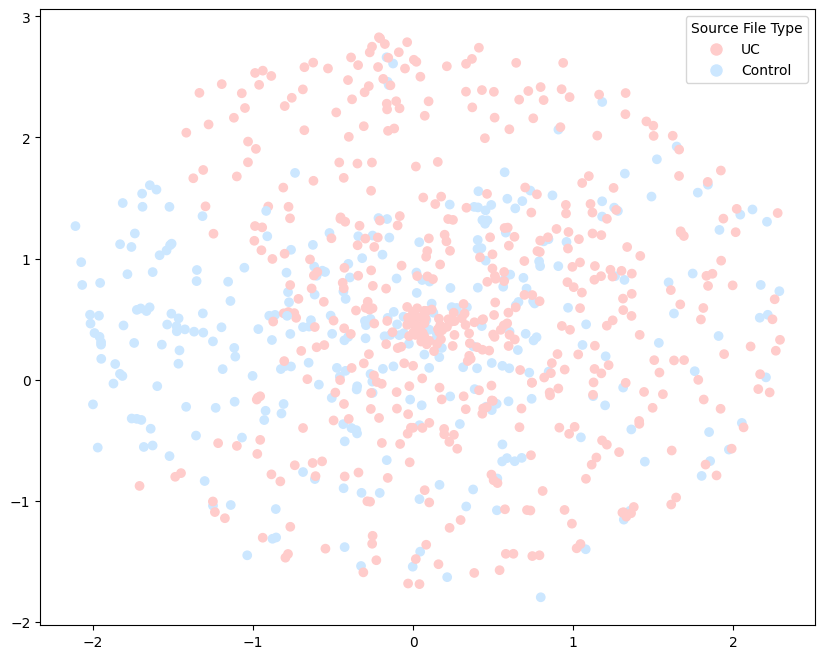

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D  # To create custom legend handles

# Assuming pivot_df is your DataFrame

# 1. Reset the index to bring 'source_file' into the columns
pivot_df_reset = pivot_df.reset_index()

# 2. Extract the features (drop the 'source_file' column now that it is a regular column)
X = pivot_df_reset.drop(columns=['source_file'])

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)

# 5. Add t-SNE results to your DataFrame
pivot_df_reset['tsne_1'] = tsne_results[:, 0]
pivot_df_reset['tsne_2'] = tsne_results[:, 1]

# 6. Create a new column for color coding based on 'source_file'
pivot_df_reset['color_label'] = pivot_df_reset['source_file'].apply(
    lambda x: 'UC' if 'UC' in x else 'Control'
)

# 7. Plot the t-SNE results with lighter colors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pivot_df_reset['tsne_1'], pivot_df_reset['tsne_2'], 
                      c=pivot_df_reset['color_label'].map({'UC': '#ffcccb', 'Control': '#cce7ff'}))  # Light pink and light blue

# 8. Add a custom legend for "UC" and "Control"
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#ffcccb', markersize=10, label='UC'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='#cce7ff', markersize=10, label='Control')]

plt.legend(handles=legend_labels, title='Source File Type')

# 9. Display the plot
plt.title


In [9]:
pivot_df_reset

cluster,source_file,0,1,2,3,4,5,6,7,8,...,11553,11554,11555,11556,11557,11558,11559,tsne_1,tsne_2,color_label
0,CDR3_results_SRR14787784_Control.txt,0.000000,0.000000,0.000778,0.0,0.000000,0.0,0.002335,0.000778,0.000000,...,0.000778,0.0,0.0,0.0,0.0,0.0,0.000000,-0.405220,0.957179,Control
1,CDR3_results_SRR14787785_Control.txt,0.000000,0.000000,0.000674,0.0,0.000000,0.0,0.001348,0.000674,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.039592,-0.374101,Control
2,CDR3_results_SRR14787786_Control.txt,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000996,0.000000,0.000996,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.522303,1.820202,Control
3,CDR3_results_SRR14787787_Control.txt,0.000000,0.000000,0.000963,0.0,0.000000,0.0,0.001927,0.000963,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.171123,0.783259,Control
4,CDR3_results_SRR14787788_Control.txt,0.000951,0.000000,0.000000,0.0,0.000000,0.0,0.002854,0.000000,0.000951,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.077690,-1.397680,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,CDR3_results_SRR25927668_Control.txt,0.000000,0.000000,0.000766,0.0,0.000000,0.0,0.003065,0.000766,0.000766,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-1.115171,-0.180401,Control
811,CDR3_results_SRR25927669_Control.txt,0.000000,0.000000,0.000856,0.0,0.000000,0.0,0.002568,0.000856,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-1.522065,-0.629167,Control
812,CDR3_results_SRR25927670_Control.txt,0.000000,0.000736,0.000000,0.0,0.000736,0.0,0.001473,0.000736,0.000736,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-1.054513,0.925507,Control
813,CDR3_results_SRR25927671_Control.txt,0.000798,0.000000,0.000798,0.0,0.000000,0.0,0.003990,0.000798,0.000798,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000798,-1.111197,0.191888,Control


In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Adjust 'n_clusters' based on your needs
pivot_df_reset['tsne_cluster'] = kmeans.fit_predict(pivot_df_reset[['tsne_1', 'tsne_2']])

pivot_df_reset


/home/ls/linoym/.conda/envs/my_algo/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster,source_file,0,1,2,3,4,5,6,7,8,...,11554,11555,11556,11557,11558,11559,tsne_1,tsne_2,color_label,tsne_cluster
0,CDR3_results_SRR14787784_Control.txt,0.000000,0.000000,0.000778,0.0,0.000000,0.0,0.002335,0.000778,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,-0.405220,0.957179,Control,1
1,CDR3_results_SRR14787785_Control.txt,0.000000,0.000000,0.000674,0.0,0.000000,0.0,0.001348,0.000674,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.039592,-0.374101,Control,0
2,CDR3_results_SRR14787786_Control.txt,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000996,0.000000,0.000996,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.522303,1.820202,Control,2
3,CDR3_results_SRR14787787_Control.txt,0.000000,0.000000,0.000963,0.0,0.000000,0.0,0.001927,0.000963,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.171123,0.783259,Control,0
4,CDR3_results_SRR14787788_Control.txt,0.000951,0.000000,0.000000,0.0,0.000000,0.0,0.002854,0.000000,0.000951,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.077690,-1.397680,Control,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,CDR3_results_SRR25927668_Control.txt,0.000000,0.000000,0.000766,0.0,0.000000,0.0,0.003065,0.000766,0.000766,...,0.0,0.0,0.0,0.0,0.0,0.000000,-1.115171,-0.180401,Control,1
811,CDR3_results_SRR25927669_Control.txt,0.000000,0.000000,0.000856,0.0,0.000000,0.0,0.002568,0.000856,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,-1.522065,-0.629167,Control,1
812,CDR3_results_SRR25927670_Control.txt,0.000000,0.000736,0.000000,0.0,0.000736,0.0,0.001473,0.000736,0.000736,...,0.0,0.0,0.0,0.0,0.0,0.000000,-1.054513,0.925507,Control,1
813,CDR3_results_SRR25927671_Control.txt,0.000798,0.000000,0.000798,0.0,0.000000,0.0,0.003990,0.000798,0.000798,...,0.0,0.0,0.0,0.0,0.0,0.000798,-1.111197,0.191888,Control,1


In [25]:
import pandas as pd

all_cdr3_combiined_file = os.path.join(WORK_DIR, 'All_combined_CDR3.csv')
data = pd.read_csv(all_cdr3_combiined_file)

# Count the total number of unique files
total_files = data['source_file'].nunique()

# Group by the sequence and count the unique files
sequence_file_counts = data.groupby('CDR3_sequence')['source_file'].nunique().reset_index()

# Rename columns for clarity
sequence_file_counts.columns = ['CDR3_sequence', 'file_count']

# Calculate the percentage of files each sequence appears in
sequence_file_counts['percentage'] = (sequence_file_counts['file_count'] / total_files) * 100

# Sort by file_count for better readability (optional)
sequence_file_counts = sequence_file_counts.sort_values(by='file_count', ascending=False)

# Save to a new file if needed
sequence_file_counts.to_csv("Sequence_File_Counts_Percentage.csv", index=False)

sequence_file_counts




,CDR3_sequence,file_count,percentage
18188,CVCVCVCVYF,815,100.000000
254,CAAPINSSL,815,100.000000
13115,CGARSVYF,815,100.000000
13836,CSAGAERG,815,100.000000
18756,GGSSELFF,815,100.000000
...,...,...,...
9076,CASSQGNE,1,0.122699
9079,CASSQGPR,1,0.122699
9082,CASSQGQG,1,0.122699
9083,CASSQGQGV,1,0.122699


In [30]:
# Filter sequences that appear in more than 80% of the files
threshold = 70
sequences_above_threshold = sequence_file_counts[sequence_file_counts['percentage'] > threshold]
##sequences_above_threshold = sequence_file_counts[(sequence_file_counts['percentage'] > 70) & (sequence_file_counts['percentage'] < 80)]

# Save the filtered DataFrame to a new file
sequences_above_threshold.to_csv("Sequences_Above_x_Percent.csv", index=False)

# Save the remaining sequences if needed
remaining_sequences = sequence_file_counts[sequence_file_counts['percentage'] <= threshold]

print(sequences_above_threshold)

       CDR3_sequence  file_count  percentage
18188     CVCVCVCVYF         815  100.000000
254        CAAPINSSL         815  100.000000
13115       CGARSVYF         815  100.000000
13836       CSAGAERG         815  100.000000
18756       GGSSELFF         815  100.000000
...              ...         ...         ...
18312       CVSSLGTF         630   77.300613
16906       CSSSSLSF         610   74.846626
13060  CDWSSDVCSSDLF         598   73.374233
4978        CASSDLFF         598   73.374233
6806       CASSLGDRA         582   71.411043

[62 rows x 3 columns]


In [19]:
#sequences_above_threshold = sequences_above_threshold[sequences_above_threshold['CDR3_sequence'].str.startswith('C') & sequences_above_threshold['CDR3_sequence'].str.endswith('F')]
#sequences_above_threshold

,CDR3_sequence,file_count,percentage
18188,CVCVCVCVYF,815,100.000000
13115,CGARSVYF,815,100.000000
3043,CASGVGSF,815,100.000000
11598,CATALGYF,814,99.877301
9774,CASSSGQF,804,98.650307
18227,CVLFFFFF,793,97.300613
3487,CASNLFFF,792,97.177914
11988,CATRSLFF,787,96.564417
12376,CATVPQHF,782,95.950920
12320,CATTPGQFF,747,91.656442


In [31]:
# Create the pivot table
# Filter the original data to only include sequences in "Sequences_Above_80_Percent"
filtered_data = data[data['CDR3_sequence'].isin(sequences_above_threshold['CDR3_sequence'])]
                     
pivot_table = filtered_data.pivot_table(
    index='source_file',          # Rows
    columns='CDR3_sequence',     # Columns
    values='CDR3_sequence',      # Values to aggregate
    aggfunc='count',             # Aggregation: count occurrences
    fill_value=0                 # Fill missing values with 0
)

# Add the "tag" column
pivot_table['tag'] = pivot_table.index.to_series().apply(
    lambda x: "UC" if "UC" in x else "Control"
)

pivot_table
pivot_table.to_csv(os.path.join(WORK_DIR, 'most_frequently_sequences_matrix.csv'))